## Plotting SNR from single or multiple satellites for one station

Import necessary libraries

In [1]:
import gnssvod as gv
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates

Open the dataset you want to plot SNR from

In [2]:
ds = xr.open_mfdataset('/Users/coopercollins/Box/Project_MetoliusGNSS/VOD/Data/GNSS/extracted/maturepine/maturepine_footprint/maturepine_footprint_nc/*.nc',combine='nested',concat_dim='Epoch')
ds

<xarray.Dataset> Size: 2GB
Dimensions:    (Epoch: 190216, SV: 122)
Coordinates:
  * SV         (SV) <U3 1kB 'C06' 'C07' 'C08' 'C09' ... 'R23' 'R24' 'R26' 'R27'
  * Epoch      (Epoch) datetime64[ns] 2MB 2025-03-22T18:44:30 ... 2025-05-06T...
Data variables:
    S1C        (Epoch, SV) float64 186MB dask.array<chunksize=(2881, 52), meta=np.ndarray>
    S1X        (Epoch, SV) float64 186MB dask.array<chunksize=(2881, 52), meta=np.ndarray>
    S2C        (Epoch, SV) float64 186MB dask.array<chunksize=(2881, 52), meta=np.ndarray>
    S2X        (Epoch, SV) float64 186MB dask.array<chunksize=(2881, 52), meta=np.ndarray>
    Azimuth    (Epoch, SV) float64 186MB dask.array<chunksize=(2881, 52), meta=np.ndarray>
    Elevation  (Epoch, SV) float64 186MB dask.array<chunksize=(2881, 52), meta=np.ndarray>
    S2I        (Epoch, SV) float64 186MB dask.array<chunksize=(5579, 52), meta=np.ndarray>
    S7I        (Epoch, SV) float64 186MB dask.array<chunksize=(5579, 52), meta=np.ndarray>
    S7X        (Epoch, SV) float64 186MB dask.array<chunksize=(5579, 52), meta=np.ndarray>
Attributes:
    filename:           /Users/ger/Library/CloudStorage/Box-Box/Project_Metol...
    observation_types:  ['S1C', 'S1X', 'S2C', 'S2X', 'Azimuth', 'Elevation']
    epoch:              2025-03-23
    approx_position:    [-2389606.8244 -3880762.7258  4448432.7232]

Convert the xarray.DataSet to a pandas.DataFrame for further processing

In [ ]:
dfMP = ds.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
dfMP

Subsetting the data

In [ ]:
dfMP.xs('E03',level='SV')

,S1C,S1X,S2C,S2X,Azimuth,Elevation,S2I,S7I,S7X
Epoch,,,,,,,,,
2025-03-22 18:44:30,NaN,30.2,NaN,NaN,-103.2,22.2,NaN,NaN,NaN
2025-03-22 18:45:00,NaN,31.4,NaN,NaN,-103.4,22.1,NaN,NaN,NaN
2025-03-22 18:45:30,NaN,36.8,NaN,NaN,-103.5,22.0,NaN,NaN,NaN
2025-03-22 18:46:00,NaN,39.2,NaN,NaN,-103.7,21.8,NaN,NaN,NaN
2025-03-22 18:46:30,NaN,39.2,NaN,NaN,-103.8,21.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-05-06 09:14:45,NaN,24.5,NaN,NaN,119.4,18.0,NaN,NaN,NaN
2025-05-06 09:15:00,NaN,19.3,NaN,NaN,119.5,17.9,NaN,NaN,NaN
2025-05-06 09:15:15,NaN,20.3,NaN,NaN,119.6,17.9,NaN,NaN,NaN


Single satellite, single site

Text(0.5, 1.0, 'SNR')

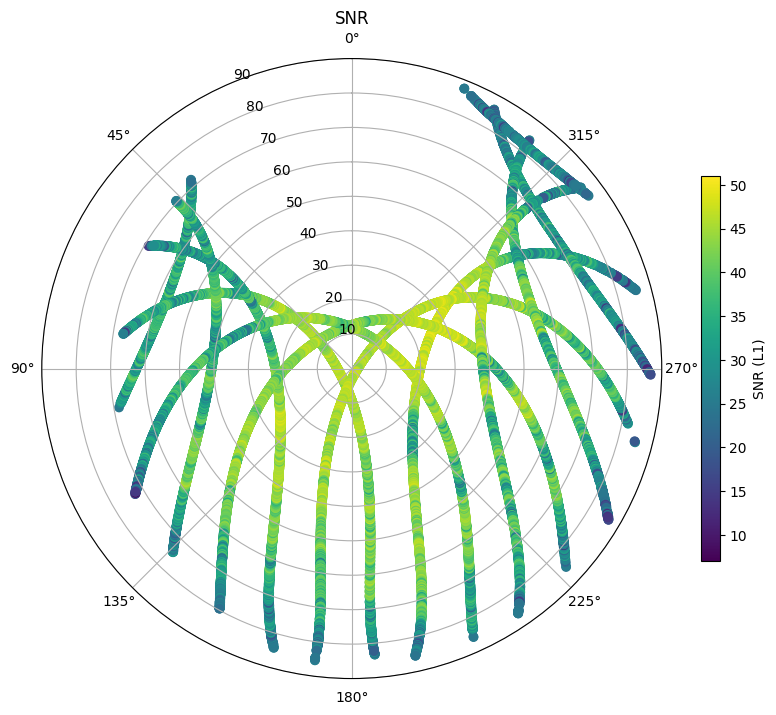

In [ ]:
mySV = 'E03'
# initialize figure with polar axes
fig, ax = plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
# subset the dataset
subdf = dfMP.xs(mySV,level='SV')

# polar plots need a radius and theta direction in radians
radius = 90-subdf.Elevation
theta = np.deg2rad(subdf.Azimuth)

# plot each measurement and color by signal to noise ratio
hs = ax.scatter(theta,radius,c=subdf.S1X)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")
plt.colorbar(hs, shrink=.5, label='SNR (L1)')
plt.title("SNR")

All satellites, one site

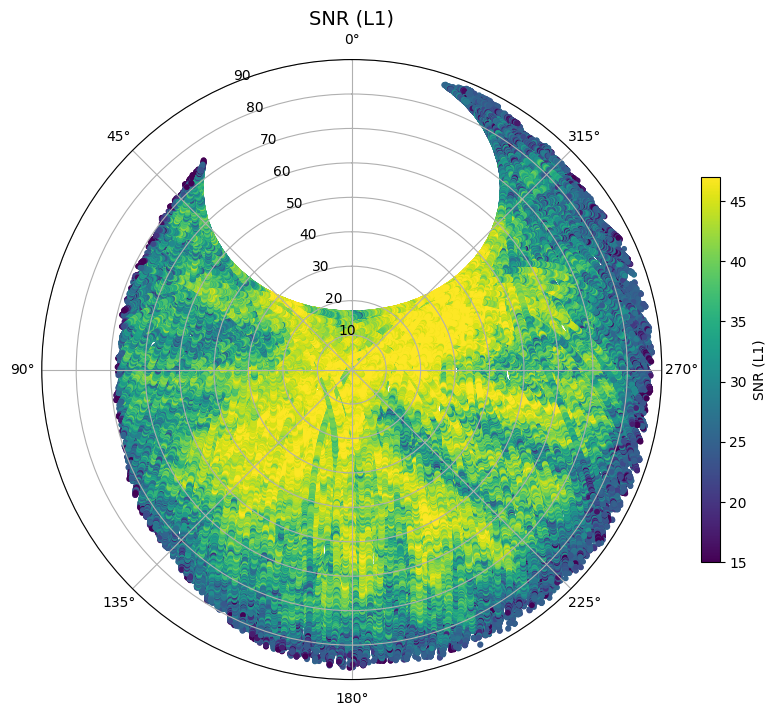

In [ ]:
# Set color limits
clim = [15, 47]

# Use the entire dataset (or subset if needed)
subdf = dfMP

# Convert to polar coordinates
radius = 90 - subdf.Elevation
theta = np.deg2rad(subdf.Azimuth)

# Initialize figure with polar axes
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Scatter plot with color based on SNR
hs = ax.scatter(theta, radius, c=subdf.S1X, s=10, cmap='viridis')
hs.set_clim(clim)

# Polar axis formatting
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")
ax.set_title("SNR (L1)", fontsize=14)

# Add colorbar
plt.colorbar(hs, ax=ax, location='right', shrink=0.5, pad=0.05, label='SNR (L1)')

plt.show()